In [22]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
from functions_suganthan import zakharov_func, cec22_test_func
from plotting_aux import plot_1, plot_2
import csv
import decimal
parser = Parser()


## Comparação de resultados com número fixo de iterações
### Comparação dos Algoritmos - função de zakharov com 10 dimensões


In [23]:
def f1(seed=0):
    experiment = {}
    error_history = {'1p1':None, 'pi':None, 'pni':None}

    def zakharov_wrapper(x:list):
        return cec22_test_func(x, 10, 1, 1)[0]

    alg = ESAlgorithm()
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(10)
    alg.set_global_variable_bounds(100, True, -100, True)
    alg.set_known_minimum(300)

    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=200000, seed=seed)
    error_history['1p1'] = alg.get_execution_history()
    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=10000, seed=seed, num_parents=10, num_offspring=20)
    error_history['pi'] = alg.get_execution_history()
    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=10000, seed=seed, num_parents=10, num_offspring=20)
    error_history['pni'] = alg.get_execution_history()

    experiment['1p1'] =  res_1[-2:-1][0]['eval']
    experiment['pi'] =  res_2[0]['eval']
    experiment['pni'] =  res_3[0]['eval']

    return experiment, error_history

experiments = []
error_histories = []
num_exp = 5
for i in range(num_exp):
    experiment, error_history = f1(i)
    experiments.append(experiment)
    error_histories.append(error_history)
    print(f"Experimento n. {i}")

Experimento n. 0
Experimento n. 1
Experimento n. 2
Experimento n. 3
Experimento n. 4


In [24]:
print(error_histories[0])

{'1p1': {'checkpoints': [200, 317, 503, 797, 1262, 2000, 3170, 5024, 7963, 12620, 20000, 31698, 50238, 79622, 126192, 200000, 200001], 'values': [20962.545184448194, 14980.693334105097, 11220.225394065887, 7430.718577814397, 1352.4887154918254, 46.04093525441931, 6.584219488559029e-05, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12]}, 'pi': {'checkpoints': [210, 330, 510, 810, 1270, 2010, 3170, 5030, 7970, 12630, 20010, 31710, 50250, 79630, 126210, 200010, 200010], 'values': [20242.18926511588, 19172.091282027235, 15798.583182062706, 11719.746246781553, 10588.925053454697, 8975.744063804985, 6435.978134331238, 2382.448919876008, 387.5086401594069, 0.0013277506058102517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'pni': {'checkpoints': [210, 330, 510, 810, 1270, 2010, 3170, 5030, 7970, 12630, 20010, 3171

In [25]:

for key in error_histories[0]:
    with open(f'zakharov_10_{key}_output.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='\'', quoting=csv.QUOTE_MINIMAL)
        checkpoints = error_histories[0][key]['checkpoints']
        first_row = ['FES']
        first_row.extend([i for i in range(len(error_histories))])
        writer.writerow(first_row)
        for i, checkpoint in enumerate(checkpoints):
            row =[checkpoint]
            for exp in error_histories:
                row.append(exp[key]['values'][i])
            writer.writerow(row)


In [26]:


print(error_histories)

[{'1p1': {'checkpoints': [200, 317, 503, 797, 1262, 2000, 3170, 5024, 7963, 12620, 20000, 31698, 50238, 79622, 126192, 200000, 200001], 'values': [20962.545184448194, 14980.693334105097, 11220.225394065887, 7430.718577814397, 1352.4887154918254, 46.04093525441931, 6.584219488559029e-05, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 1.0231815394945443e-12]}, 'pi': {'checkpoints': [210, 330, 510, 810, 1270, 2010, 3170, 5030, 7970, 12630, 20010, 31710, 50250, 79630, 126210, 200010, 200010], 'values': [20242.18926511588, 19172.091282027235, 15798.583182062706, 11719.746246781553, 10588.925053454697, 8975.744063804985, 6435.978134331238, 2382.448919876008, 387.5086401594069, 0.0013277506058102517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'pni': {'checkpoints': [210, 330, 510, 810, 1270, 2010, 3170, 5030, 7970, 12630, 20010, 317

C:\Users\patri\OneDrive\Desktop\Projects\estudos-iniciacao-cientifica\plotting_aux.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


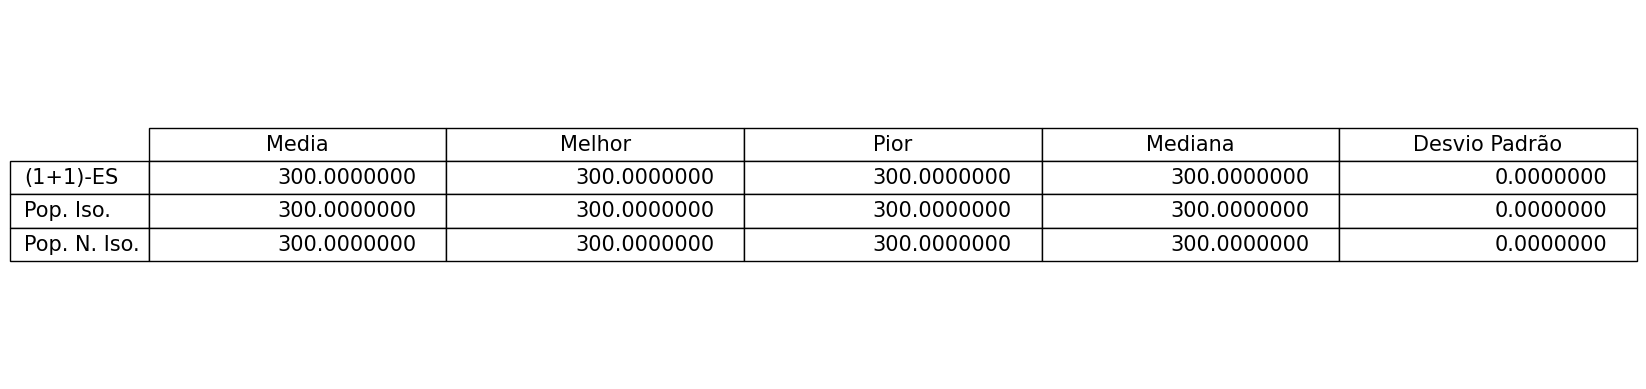

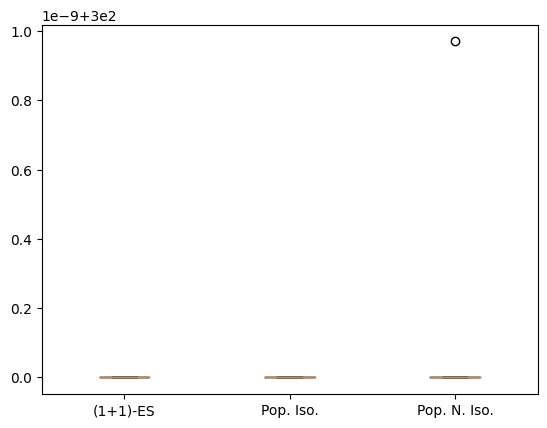

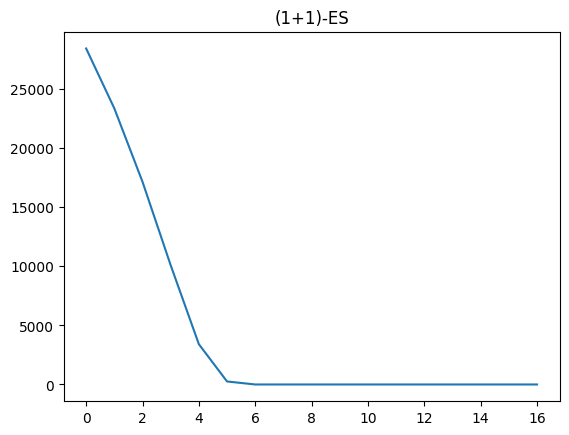

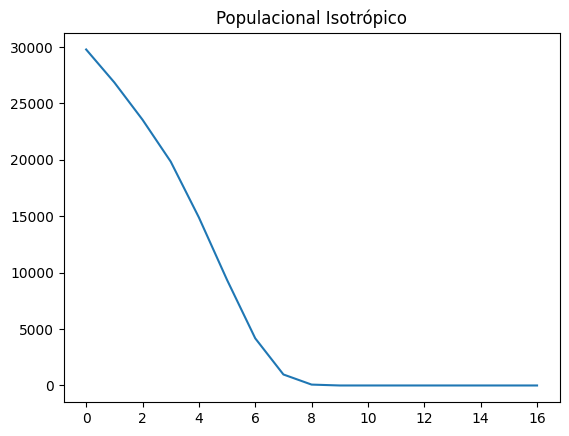

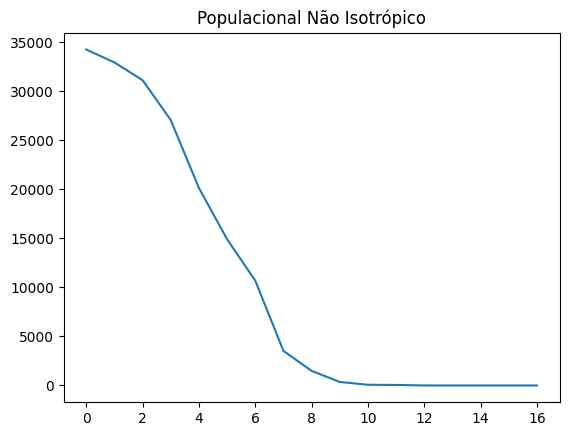

In [27]:
es1p1_errors = [0]*len(error_histories[0]['1p1']['values'])
pi_errors = [0]*len(error_histories[0]['pi']['values'])
pni_errors = [0]*len(error_histories[0]['pni']['values'])
for e in error_histories:
    for i, val in enumerate(e['pni']['values']):
        pni_errors[i] += val/num_exp
    for i, val in enumerate(e['pi']['values']):
        pi_errors[i] += val/num_exp
    for i, val in enumerate(e['1p1']['values']):
        es1p1_errors[i] += val/num_exp

plot_1(experiments)
plot_2(es1p1_errors, "(1+1)-ES")
plot_2(pi_errors, "Populacional Isotrópico")
plot_2(pni_errors, "Populacional Não Isotrópico")

### Comparação dos Algoritmos - função de zakharov com 20 dimensões

In [28]:
def f1(seed=0):
    experiment = {}
    error_history = {'1p1': None, 'pi': None, 'pni': None}

    def zakharov_wrapper(x: list):
        return cec22_test_func(x, 20, 1, 1)[0]

    alg = ESAlgorithm()
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(20)
    alg.set_global_variable_bounds(100, True, -100, True)
    alg.set_known_minimum(300)

    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=1000000, seed=seed)
    error_history['1p1'] = alg.get_execution_history()
    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=50000, seed=seed,num_parents=10, num_offspring=20)
    error_history['pi'] = alg.get_execution_history()
    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=50000, seed=seed, num_parents=10, num_offspring=20)
    error_history['pni'] = alg.get_execution_history()

    experiment['1p1'] = res_1[-2:-1][0]['eval']
    experiment['pi'] = res_2[0]['eval']
    experiment['pni'] = res_3[0]['eval']

    return experiment, error_history


experiments = []
error_histories = []
num_exp = 5
for i in range(num_exp):
    experiment, error_history = f1(i)
    experiments.append(experiment)
    error_histories.append(error_history)
    print(f"Experimento n. {i}")

Experimento n. 0

 Error: Cannot open M_1_D20.txt for reading 



NameError: name 'M' is not defined

C:\Users\patri\OneDrive\Desktop\Projects\estudos-iniciacao-cientifica\plotting_aux.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


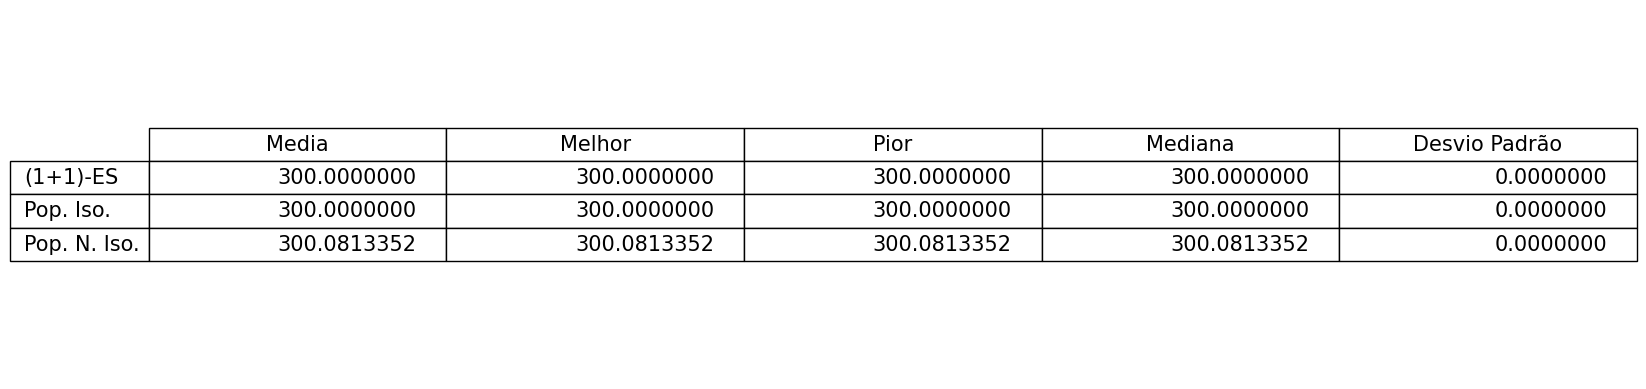

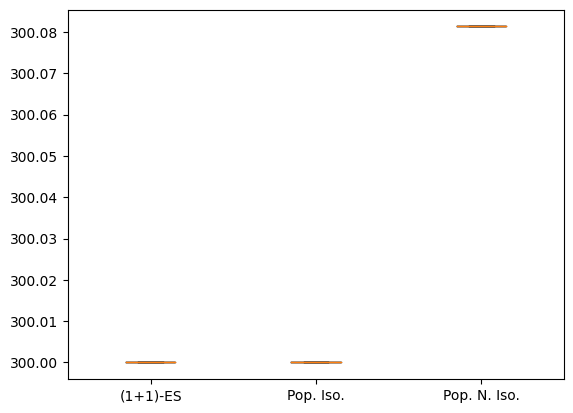

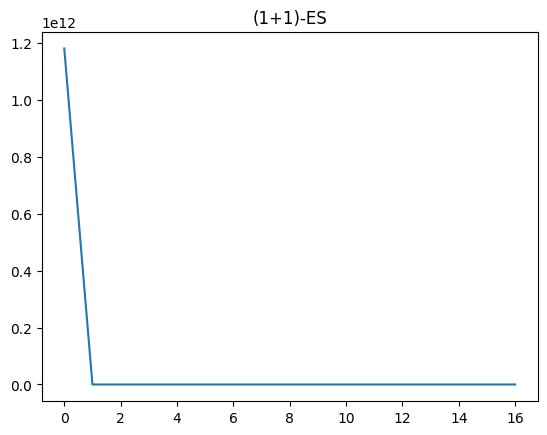

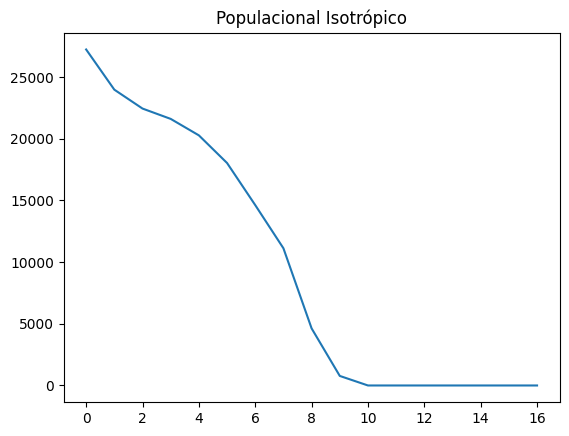

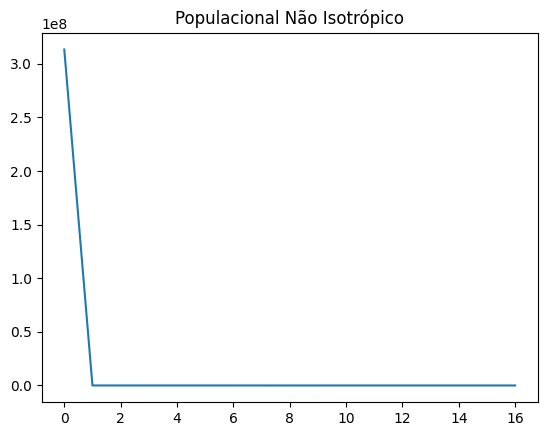

In [29]:

#print(error_histories)
es1p1_errors = [0] * len(error_histories[0]['1p1']['values'])
pi_errors = [0] * len(error_histories[0]['pi']['values'])
pni_errors = [0] * len(error_histories[0]['pni']['values'])
for e in error_histories:
    for i, val in enumerate(e['pni']['values']):
        pni_errors[i] += val / num_exp
    for i, val in enumerate(e['pi']['values']):
        pi_errors[i] += val / num_exp
    for i, val in enumerate(e['1p1']['values']):
        es1p1_errors[i] += val / num_exp

plot_1(experiments)
plot_2(es1p1_errors, "(1+1)-ES")
plot_2(pi_errors, "Populacional Isotrópico")
plot_2(pni_errors, "Populacional Não Isotrópico")

In [30]:
for key in error_histories[0]:
    with open(f'zakharov_20_{key}_output.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='\'', quoting=csv.QUOTE_MINIMAL)
        checkpoints = error_histories[0][key]['checkpoints']
        first_row = ['FES']
        first_row.extend([i for i in range(len(error_histories))])
        writer.writerow(first_row)
        for i, checkpoint in enumerate(checkpoints):
            row =[checkpoint]
            for exp in error_histories:
                row.append(exp[key]['values'][i])
            writer.writerow(row)
